In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

dataset_train = pd.read_csv('./Ash/df_reg_imp.csv')
dataset_train = dataset_train.drop(['Alley','MiscFeature','Fence','PoolQC'], axis = 1)

In [2]:
X = dataset_train.iloc[:, :-1].values
y = dataset_train.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.fit_transform(X_test[:, :])

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [int(x) for x in np.linspace(start=10, stop=10000, num=101)], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['sigmoid', 'rbf']}
grid = GridSearchCV(estimator=SVR(), param_grid=param_grid, verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 1010 candidates, totalling 5050 fits
{'C': 10000, 'gamma': 0.01, 'kernel': 'sigmoid'}
SVR(C=10000, gamma=0.01, kernel='sigmoid')


In [6]:
y_ts_pred = grid.predict(X_test)
print('test MSE: %.3f' % mean_squared_error(y_test, y_ts_pred))

test MSE: 1754128887.352


gamma=1.000000 train MSE: 567683871556.316
gamma=1.000000 test MSE: 445652220033.416
gamma=0.100000 train MSE: 173782291855.166
gamma=0.100000 test MSE: 143054118717.964
gamma=0.010000 train MSE: 1283227814.635
gamma=0.010000 test MSE: 884627592.799
gamma=0.001000 train MSE: 2033553473.381
gamma=0.001000 test MSE: 1666178703.426
gamma=0.000100 train MSE: 5476468777.104
gamma=0.000100 test MSE: 5194328801.131


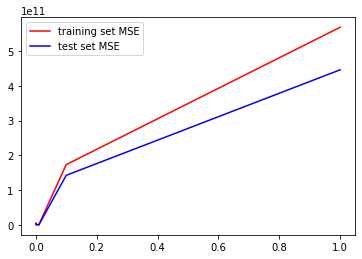

In [8]:
gammas = [1, 0.1, 0.01, 0.001, 0.0001]
train_mses = []
test_mses = []

for i in gammas:
    svr = SVR(C=10000, gamma=i, kernel='sigmoid')
    X_svr = svr.fit(X_train, y_train)

    y_tr_pred = X_svr.predict(X_train)
    y_ts_pred = X_svr.predict(X_test)

    train_mse = mean_squared_error(y_train, y_tr_pred)
    test_mse = mean_squared_error(y_test, y_ts_pred)
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    
    print('gamma=%f train MSE: %.3f' % (i, train_mse))
    print('gamma=%f test MSE: %.3f' % (i, test_mse))

    # START_POINT = 100
    # END_POINT = 150
    # x = np.arange(START_POINT, END_POINT)
    # plt.plot(x, y_ts_pred[START_POINT:END_POINT],color = 'red')
    # plt.scatter(x, y_test[START_POINT:END_POINT],color = 'blue')

    # plt.show()

plt.plot(gammas, train_mses, color='red', label="training set MSE")
plt.plot(gammas, test_mses, color='blue', label="test set MSE")
plt.legend()
plt.show()

C=10 train MSE: 6512699648.489
C=10 test MSE: 6245114559.021


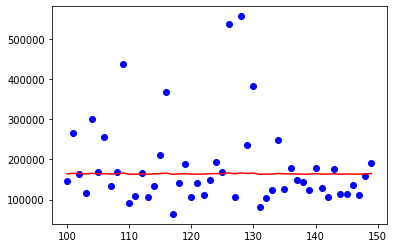

C=100 train MSE: 5510602335.215
C=100 test MSE: 5225879524.203


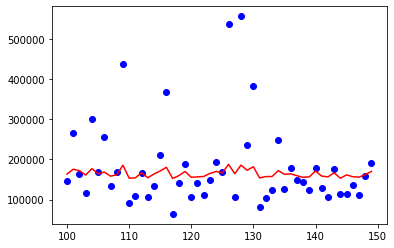

C=1000 train MSE: 2111170296.203
C=1000 test MSE: 1754128887.352


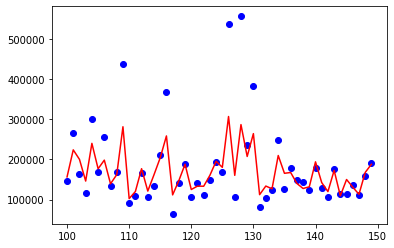

C=5000 train MSE: 1350982964.473
C=5000 test MSE: 970222890.347


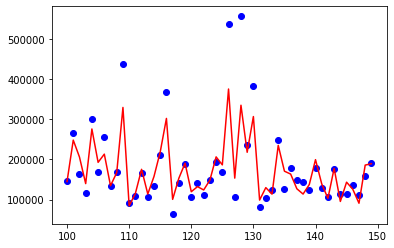

C=10000 train MSE: 1283227814.635
C=10000 test MSE: 884627592.799


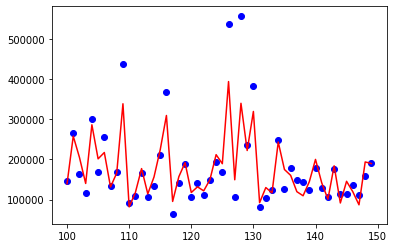

C=15000 train MSE: 1344513079.772
C=15000 test MSE: 921124635.813


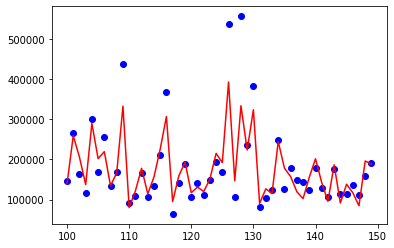

C=20000 train MSE: 1468313813.158
C=20000 test MSE: 1007907304.429


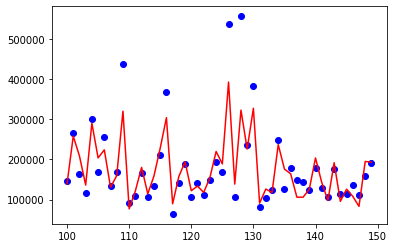

In [22]:
Cs = [10, 100, 1000, 10000, 15000, 20000]
train_mses = []
test_mses = []

for i in Cs:
    svr = SVR(C=i, gamma=0.01, kernel='sigmoid')
    X_svr = svr.fit(X_train, y_train)

    y_tr_pred = X_svr.predict(X_train)
    y_ts_pred = X_svr.predict(X_test)
    print('C=%d train MSE: %.3f' % (i, mean_squared_error(y_train, y_tr_pred)))
    print('C=%d test MSE: %.3f' % (i, mean_squared_error(y_test, y_ts_pred)))

    START_POINT = 100
    END_POINT = 150
    x = np.arange(START_POINT, END_POINT)
    plt.plot(x, y_ts_pred[START_POINT:END_POINT],color = 'red')
    plt.scatter(x, y_test[START_POINT:END_POINT],color = 'blue')

    plt.show()